# K - Means Clustering
## by Sklearn Module for Customer Segmentation Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the Customers Data

In [2]:
data_df = pd.read_csv('../data/Cust_Segmentation.csv')
data_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Analysing Data

In [3]:
# for attribute in data_df.columns:
#     print(attribute, ": ", np.unique(data_df[attribute]))
# we find from the above, the values of the each attributes    
data_df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

### Data Preprocessing

Removing Customer ID and Address field, 

In [4]:
new_df = data_df.drop(['Customer Id', 'Address'], 'columns')
new_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


Few Values in Defaulted attribute are NaN, so converting them to numbers

In [5]:
x = np.nan_to_num(new_df)
x[:5]

array([[4.100e+01, 2.000e+00, 6.000e+00, 1.900e+01, 1.240e-01, 1.073e+00,
        0.000e+00, 6.300e+00],
       [4.700e+01, 1.000e+00, 2.600e+01, 1.000e+02, 4.582e+00, 8.218e+00,
        0.000e+00, 1.280e+01],
       [3.300e+01, 2.000e+00, 1.000e+01, 5.700e+01, 6.111e+00, 5.802e+00,
        1.000e+00, 2.090e+01],
       [2.900e+01, 2.000e+00, 4.000e+00, 1.900e+01, 6.810e-01, 5.160e-01,
        0.000e+00, 6.300e+00],
       [4.700e+01, 1.000e+00, 3.100e+01, 2.530e+02, 9.308e+00, 8.908e+00,
        0.000e+00, 7.200e+00]])

### Normalizing the Data

In [6]:
from sklearn import preprocessing

standard_x = preprocessing.StandardScaler().fit(x).transform(x)
standard_x[:5]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653]])

### Training the k Means Model

In [7]:
from sklearn import cluster

k = 3
clust = cluster.KMeans(n_clusters=k, init='random', n_init=12)
clust.fit(standard_x)

k_means_labels = clust.labels_
k_means_centroid = clust.cluster_centers_

# print("labels: ", k_means_labels)
print("Centroids: ", k_means_centroid)

Centroids:  [[-3.90439547e-01  1.62695612e-01 -6.79376729e-01 -3.86448408e-01
  -6.83901553e-05 -6.93056978e-02  1.87982575e+00  5.69270845e-01]
 [-1.50796609e-01 -1.15651304e-01 -1.38795179e-01 -2.73411279e-01
  -3.40626044e-01 -3.71502176e-01 -5.23796543e-01 -3.28592133e-01]
 [ 9.91773769e-01  2.38756999e-01  1.27421461e+00  1.43518566e+00
   1.24440502e+00  1.43538377e+00 -2.09335587e-01  5.57517111e-01]]


In [8]:
standard_new_df = pd.DataFrame(standard_x, columns=new_df.columns)
standard_new_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507


### Insights

Adding the labels to the Data_frame

In [9]:
standard_new_df['cluster_n'] = k_means_labels
standard_new_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_n
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525,1
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387,2
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554,0
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525,1
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507,2


Finding the mean of the data for each attribute wrt to label, which is nothing but the centroid

In [10]:
standard_new_df.groupby(['cluster_n']).mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster_n,,,,,,,,
0,-0.390440,0.162696,-0.679377,-0.386448,-0.000068,-0.069306,1.879826,0.569271
1,-0.150797,-0.115651,-0.138795,-0.273411,-0.340626,-0.371502,-0.523797,-0.328592
2,0.991774,0.238757,1.274215,1.435186,1.244405,1.435384,-0.209336,0.557517


### Plotting The Data sets

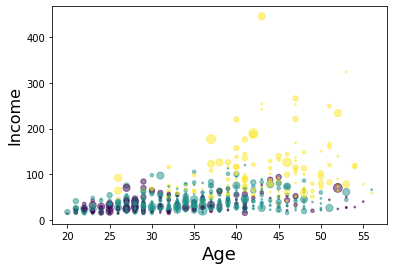

In [11]:
area = np.pi * ( x[:, 1])**2  
plt.scatter(x[:, 0], x[:, 3], s=area, c=k_means_labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

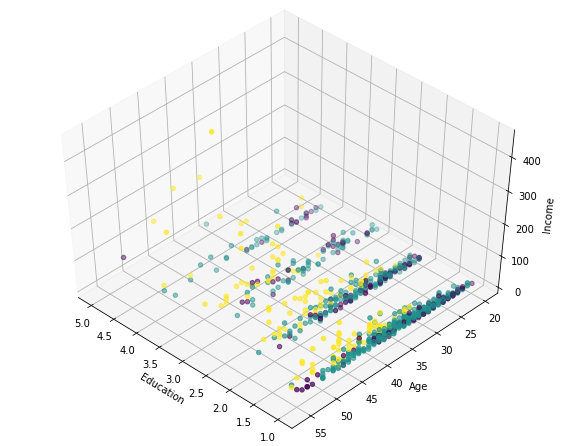

In [12]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(x[:, 1], x[:, 0], x[:, 3], c= k_means_labels.astype(np.float))

